
### <p align="center">California Housing Price Prediction</p>



In [ ]:
%pip install pandas matplotlib seaborn scikit-learn

In [2]:
# importing pandas & loading dataset 
import pandas as p
df = p.read_csv('housing.csv')

In [ ]:
#head, tail, shapre & is null 
df.head() #Gives the first 5 rows
df.tail() #Gives the last 5 rows
df.shape #Gives the shape of the dataset (rows, columns) -> (20640,10)
df.isnull().sum() #Gives the count of null values present in each column


In [ ]:
# info() method 
df.info()

In [ ]:
#describe table 
df.describe() # Run and see the output yourself because it's too big.

In [ ]:
df['ocean_proximity'].unique()

In [ ]:
df['ocean_proximity'].value_counts()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

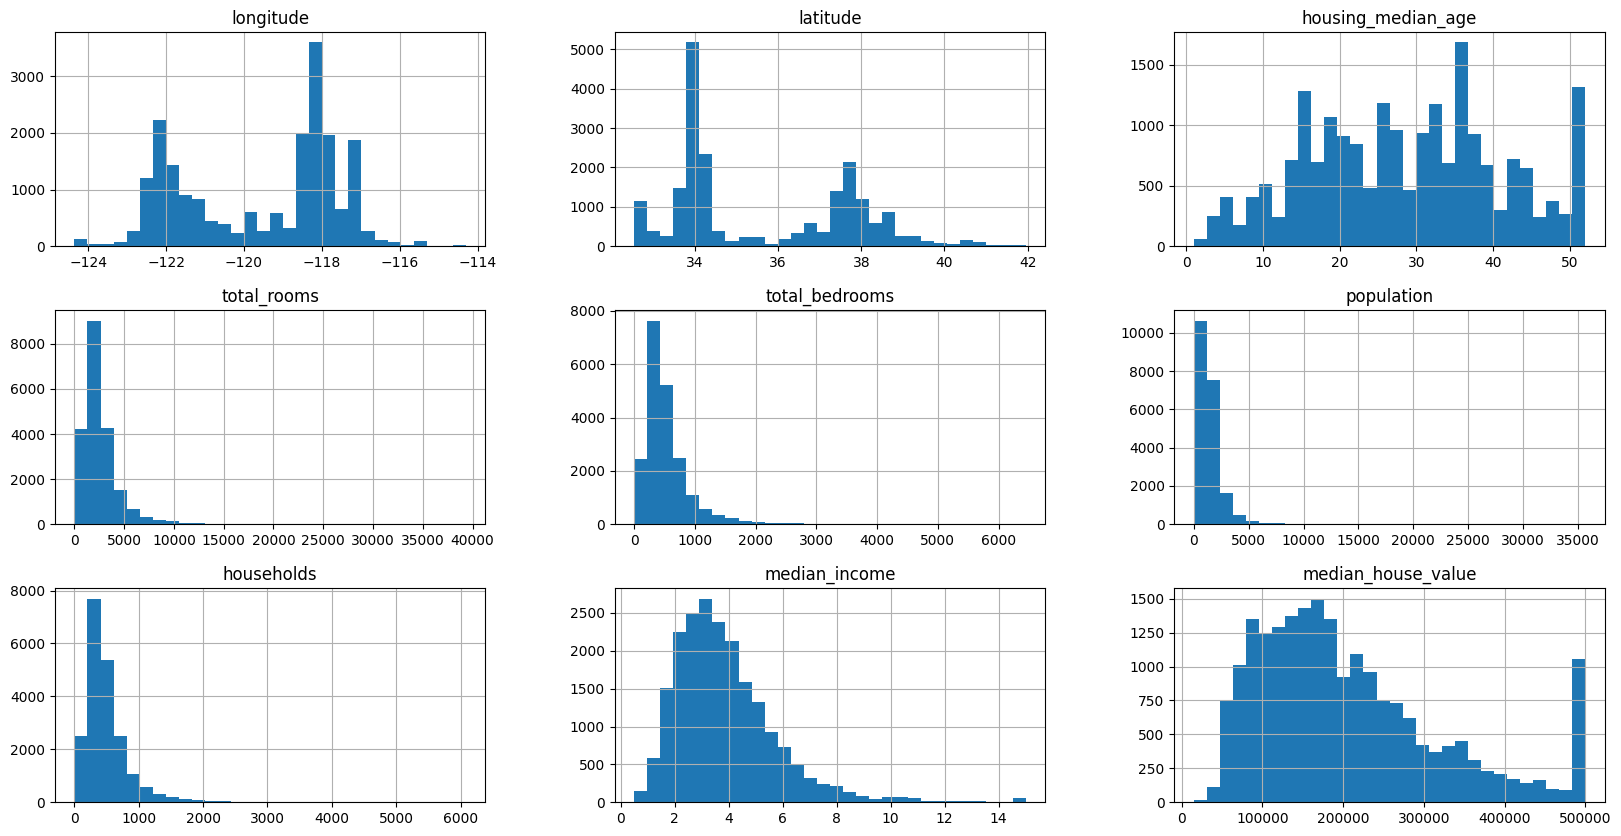

In [26]:
#matplotlib 
import matplotlib.pyplot as plt
df.hist(bins=30, figsize=(20, 10))

In [ ]:
#Create a test set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2,
random_state=8)
train_set.shape, test_set.shape #((16512, 10), (4128, 10))

In [ ]:
df_numeric = df.select_dtypes(include=[float, int])
df_numeric.corr()['median_house_value'].sort_values(ascending=False)

In [11]:
df['median_income'].min(), df['median_income'].max()

(np.float64(0.4999), np.float64(15.0001))

In [ ]:
import numpy as n
df['income_cat'] = p.cut(df['median_income'], bins=[0., 1.5, 3.0, 4.5,
6.0, n.inf], labels=[1, 2, 3, 4, 5])
df.head()

In [ ]:
strat_train_set, strat_test_set = train_test_split(df, test_size=0.2,
stratify=df['income_cat'], random_state=8)
strat_train_set['income_cat'].value_counts()

In [14]:
strat_train_set.drop(columns='income_cat', inplace=True)
strat_test_set.drop(columns='income_cat', inplace=True)

<Axes: xlabel='longitude', ylabel='latitude'>

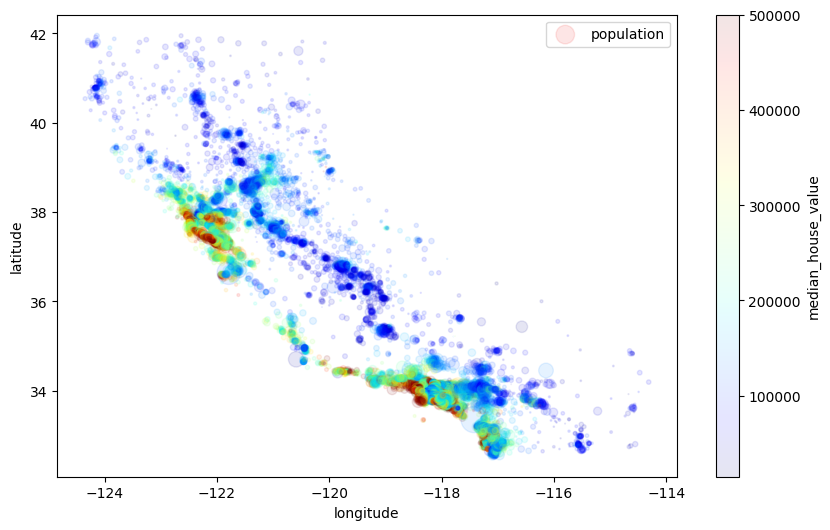

In [15]:
df.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    figsize=(10, 6),
    s=df['population']/100,
    label='population',
    alpha=0.1,
    c='median_house_value',
    cmap='jet',
    colorbar=True
)

In [16]:
housing = strat_train_set.drop(columns='median_house_value')
housing_label = strat_train_set['median_house_value'].copy()

In [ ]:
#Clean and Preprocess the dataset
housing.isnull().sum()

In [ ]:
housing_num = housing.drop(columns='ocean_proximity')
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
('impute', SimpleImputer(strategy='median')),
('standarize', StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

In [19]:
from sklearn.preprocessing import OneHotEncoder
num_attributes = list(housing_num)
cat_attributes = ['ocean_proximity']
from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([
('num', num_pipeline, num_attributes),
('cat', OneHotEncoder(), cat_attributes)
])

In [20]:
housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
#LinearRegression
import numpy as n
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(housing_prepared, housing_label)
some_data = housing.iloc[:5]
some_label = housing_label.iloc[:5]
some_prepared_data = full_pipeline.transform(some_data)
some_prediction = lr.predict(some_prepared_data)
from sklearn.metrics import mean_squared_error, mean_absolute_error
error = mean_squared_error(some_label, some_prediction)
n.sqrt(error) 

In [ ]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(housing_prepared, housing_label)
dtr_prediction = dtr.predict(some_prepared_data)
dtr_error = mean_squared_error(some_label,dtr_prediction)
n.sqrt(dtr_error)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtr, housing_prepared, housing_label,
scoring='neg_mean_squared_error', cv=10)
n.sqrt(-scores)

In [ ]:
n.sqrt(-scores).mean()

In [ ]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(housing_prepared, housing_label)
rfr_scores = cross_val_score(rfr, housing_prepared, housing_label,
scoring='neg_mean_squared_error', cv=10)
n.sqrt(-rfr_scores), n.sqrt(-rfr_scores).mean()

In [ ]:
# dumping the model using joblib
import joblib
#joblib.dump(rfr, 'rfr_model.pkl')